In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

import missingno as msno
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [8]:
### Part 1. Import & Data Check

df_train = pd.read_csv("train.csv", parse_dates = ['datetime'])
df_test = pd.read_csv("test.csv", parse_dates = ['datetime'])

In [9]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
for col in df_train.columns:
    msperc = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msperc)

column:   datetime	 Percent of Nan value: 0.00%
column:     season	 Percent of Nan value: 0.00%
column:    holiday	 Percent of Nan value: 0.00%
column: workingday	 Percent of Nan value: 0.00%
column:    weather	 Percent of Nan value: 0.00%
column:       temp	 Percent of Nan value: 0.00%
column:      atemp	 Percent of Nan value: 0.00%
column:   humidity	 Percent of Nan value: 0.00%
column:  windspeed	 Percent of Nan value: 0.00%
column:     casual	 Percent of Nan value: 0.00%
column: registered	 Percent of Nan value: 0.00%
column:      count	 Percent of Nan value: 0.00%


<AxesSubplot:>

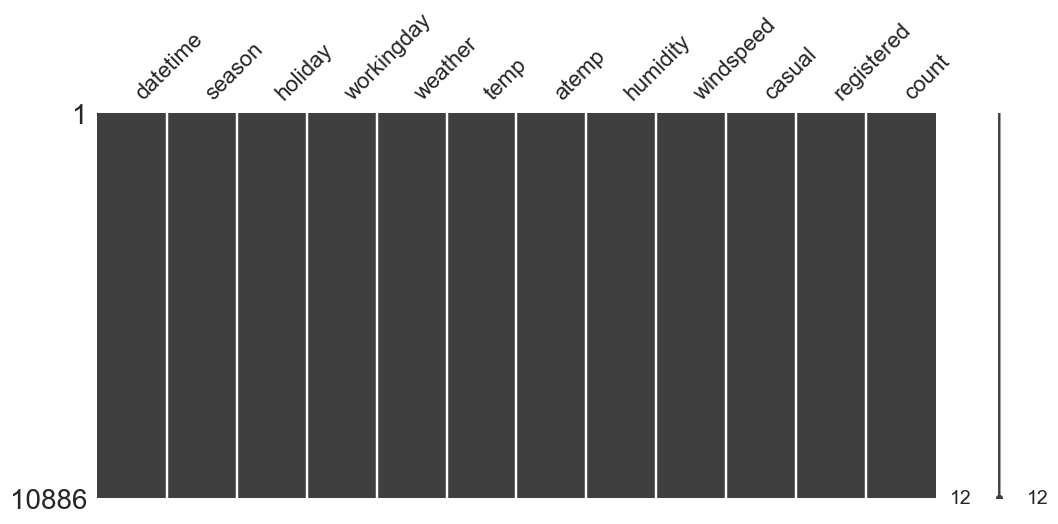

In [16]:
msno.matrix(df_train, figsize=(12,5))

Skewness: 1.242066
Kurtosis: 1.300093


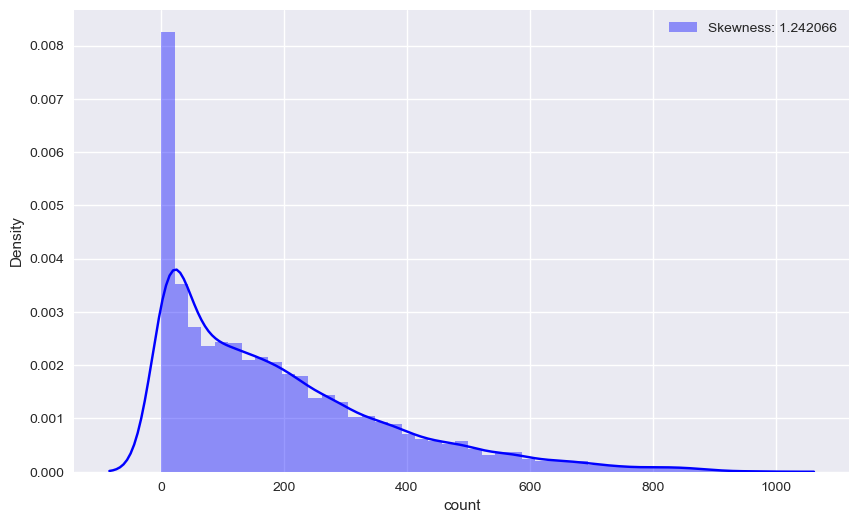

In [17]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df_train["count"], color = "b", label = "Skewness: {:2f}".format(df_train["count"].skew()), ax = ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df_train["count"].skew())
print("Kurtosis: %f" % df_train["count"].kurt())

In [19]:
### Part 2. EDA

df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second

df_test["year"] = df_test["datetime"].dt.year
df_test["month"] = df_test["datetime"].dt.month
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour
df_test["minute"] = df_test["datetime"].dt.minute
df_test["second"] = df_test["datetime"].dt.second

In [20]:
df_train.shape

(10886, 18)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

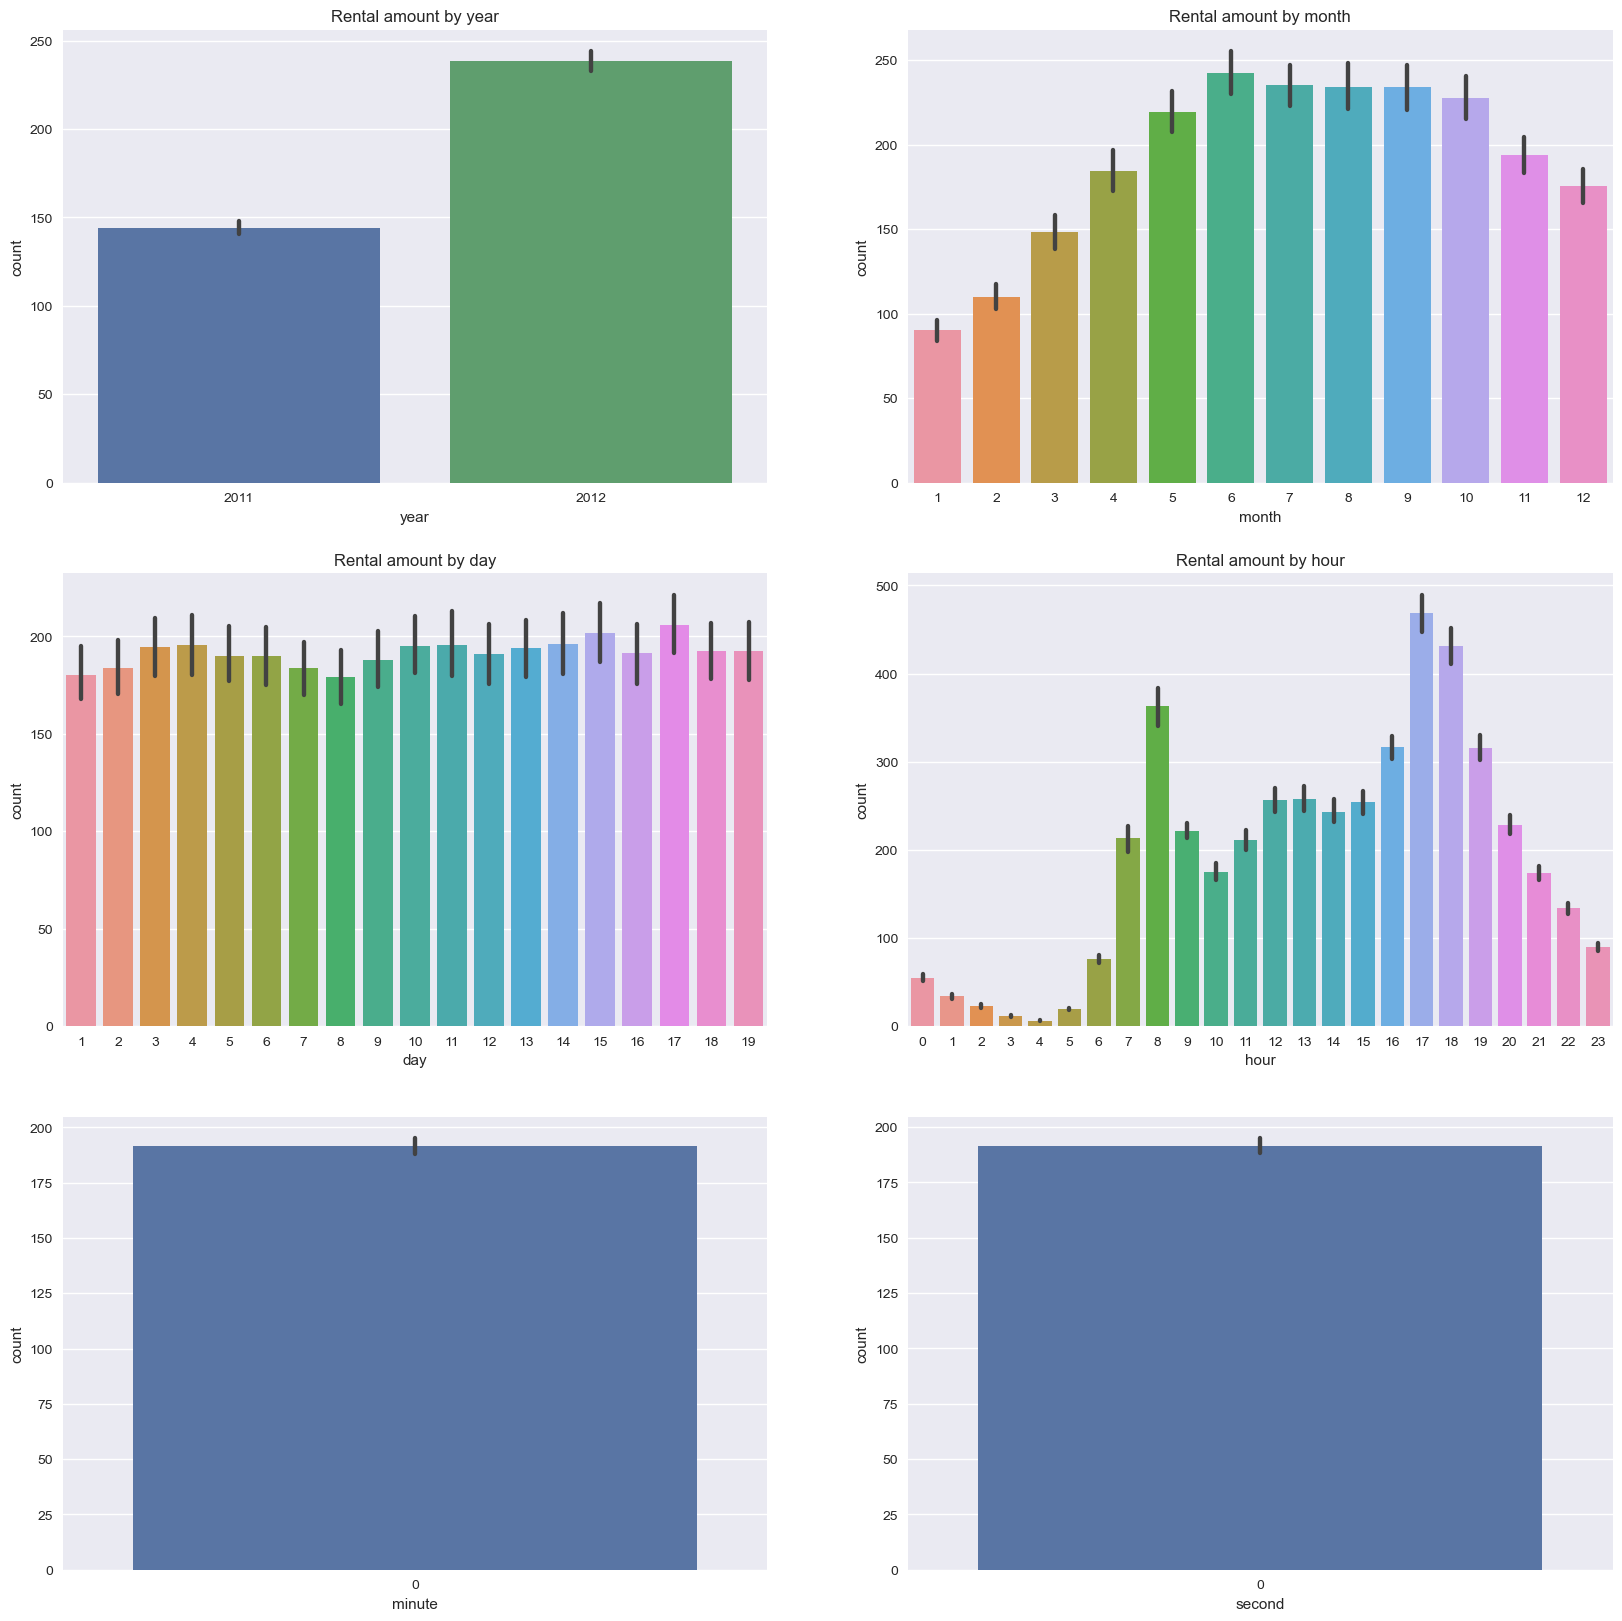

In [23]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2)
figure.set_size_inches(20, 20)

sns.barplot(data=df_train, x="year", y="count", ax = ax1)
sns.barplot(data=df_train, x="month", y="count", ax = ax2)
sns.barplot(data=df_train, x="day", y="count", ax = ax3)
sns.barplot(data=df_train, x="hour", y="count", ax = ax4)
sns.barplot(data=df_train, x="minute", y="count", ax = ax5)
sns.barplot(data=df_train, x="second", y="count", ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

In [24]:
df_train["dayofweek"] = df_train["datetime"].dt.dayofweek
df_test["dayofweek"] = df_test["datetime"].dt.dayofweek
df_train.shape

(10886, 19)

In [25]:
df_train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

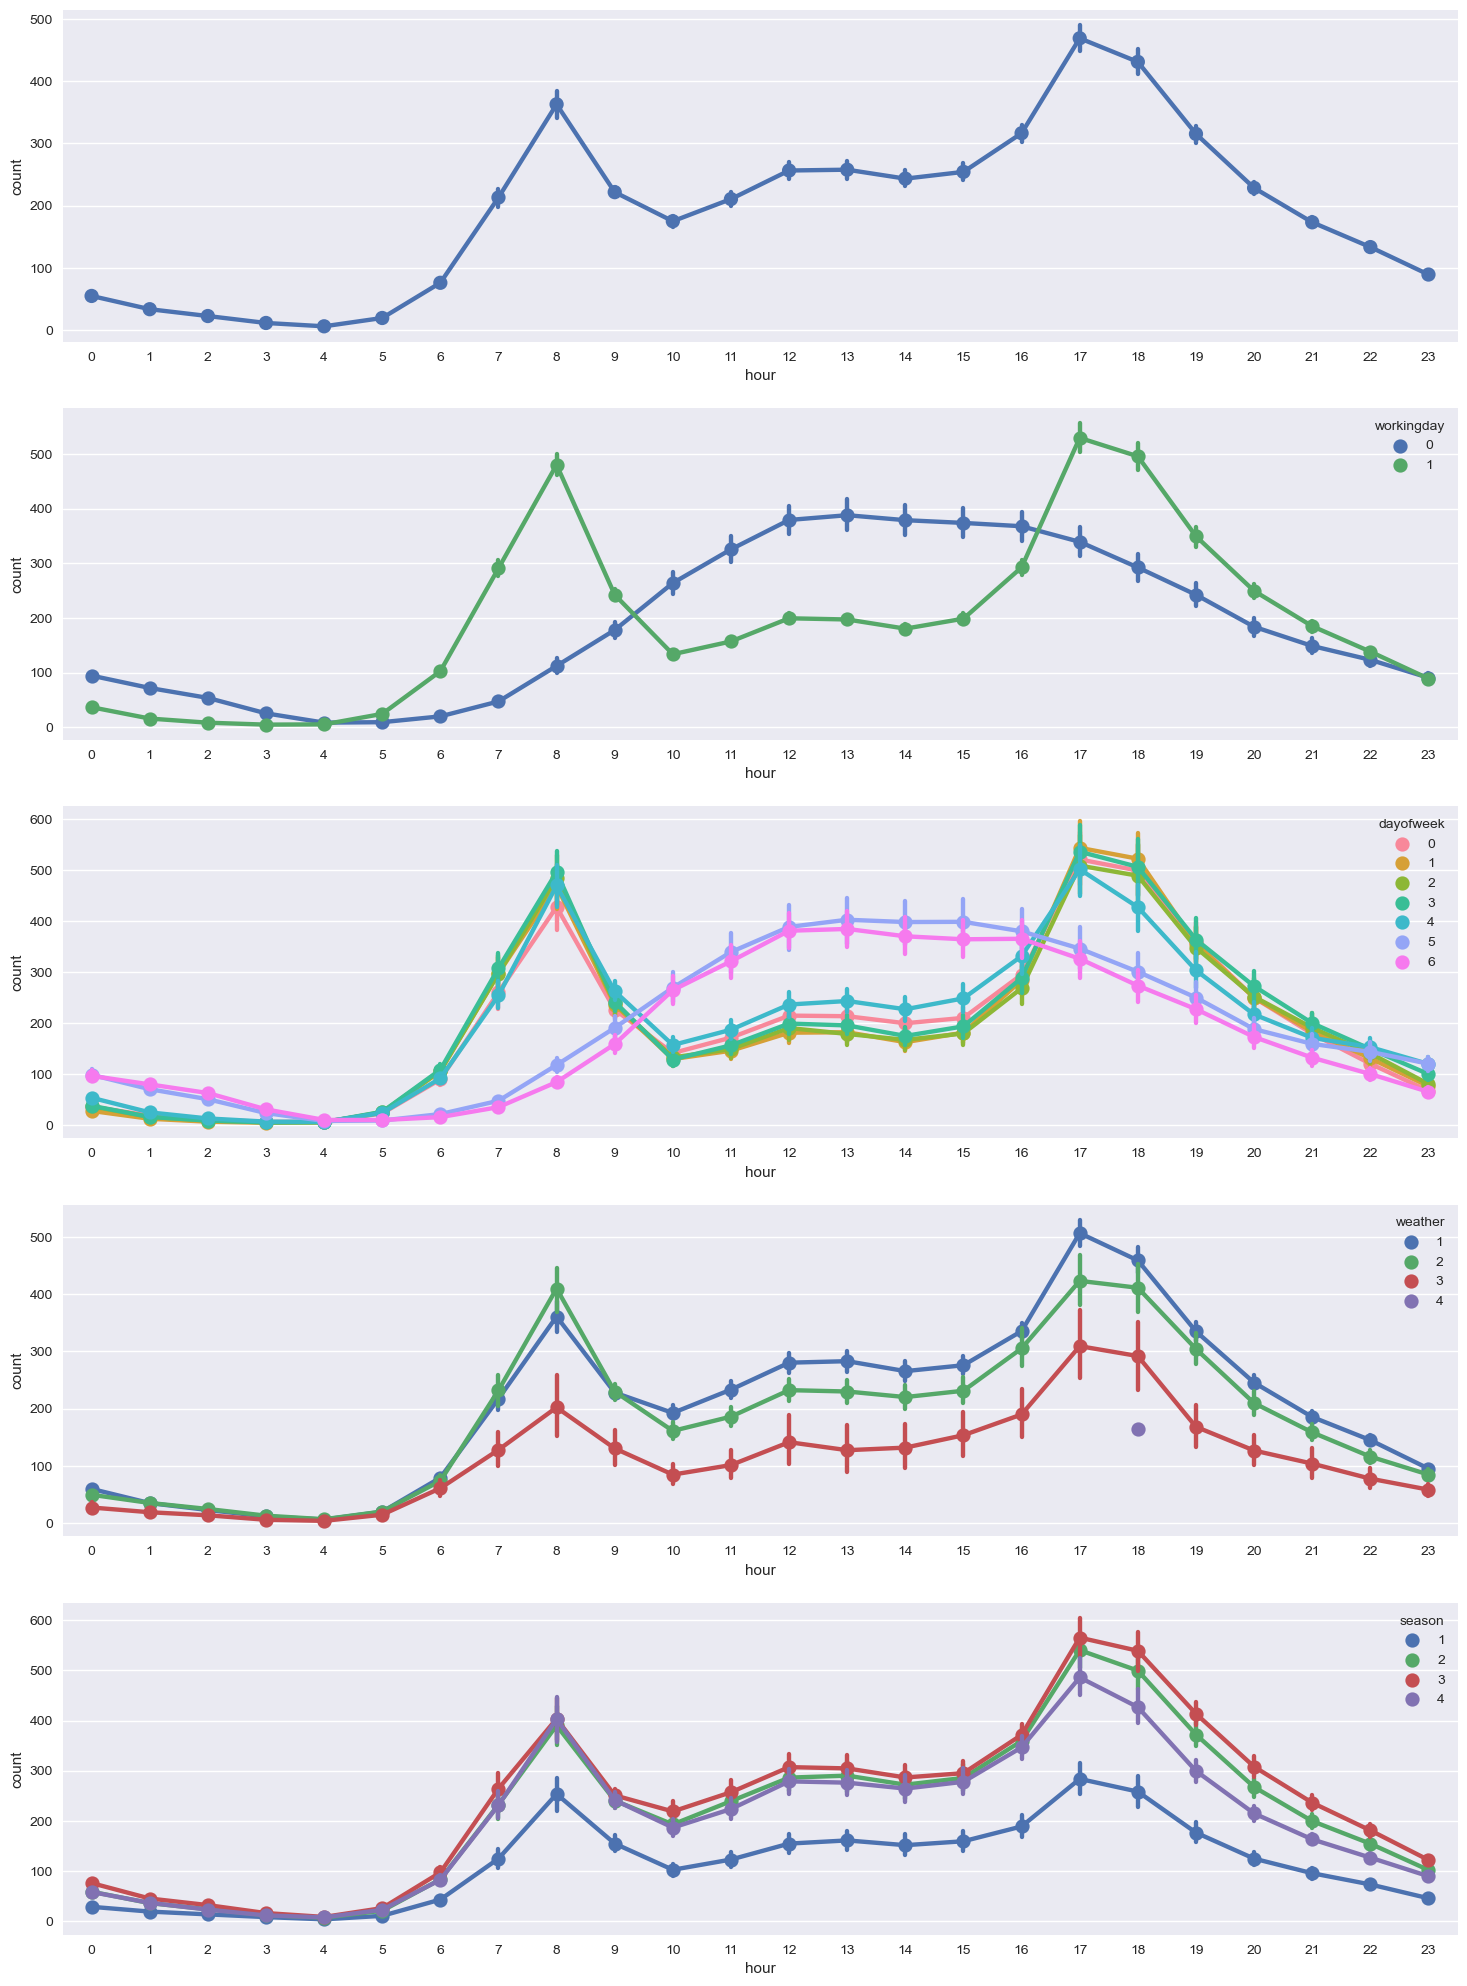

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = df_train, x = "hour", y = "count", ax = ax1)
sns.pointplot(data = df_train, x = "hour", y = "count", hue = "workingday", ax = ax2)
sns.pointplot(data = df_train, x = "hour", y = "count", hue = "dayofweek", ax = ax3)
sns.pointplot(data = df_train, x = "hour", y = "count", hue = "weather", ax = ax4)
sns.pointplot(data = df_train, x = "hour", y = "count", hue = "season", ax = ax5)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

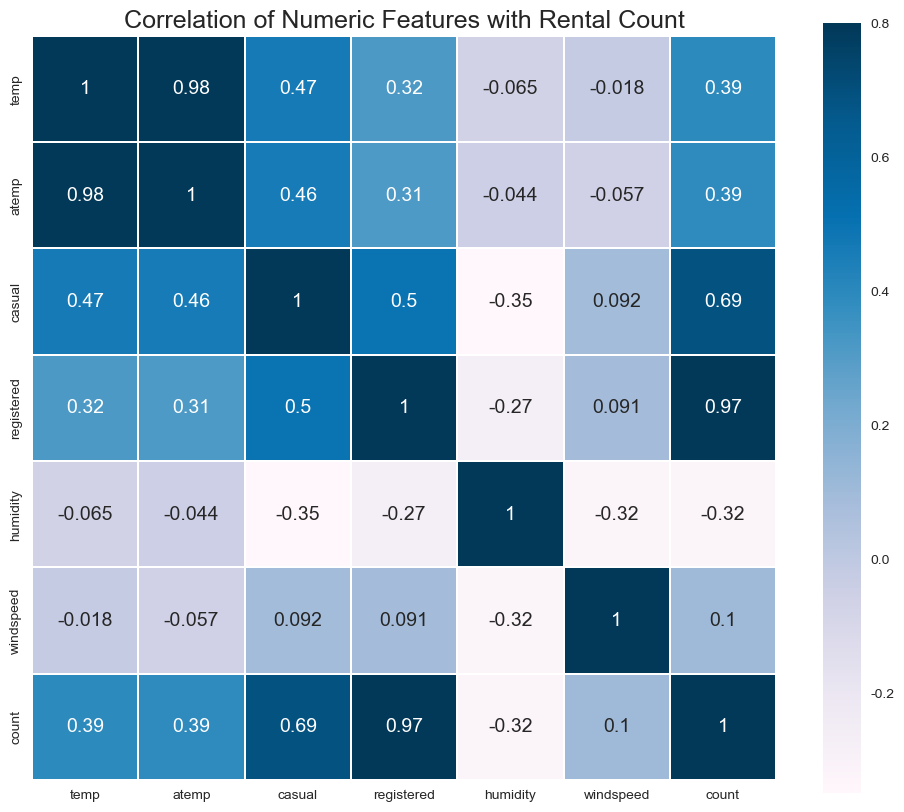

In [29]:
corr_data = df_train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]

colormap = plt.cm.PuBu

f, ax = plt.subplots(figsize = (12, 10))
plt.title('Correlation of Numeric Features with Rental Count', y = 1, size = 18)
sns.heatmap(corr_data.corr(), annot = True, vmax = .8, linewidths = 0.1, square = True, cmap = colormap,
            linecolor = "white", annot_kws = {'size' : 14})

# anot = True 해줘야 값 보임

<AxesSubplot:xlabel='humidity', ylabel='count'>

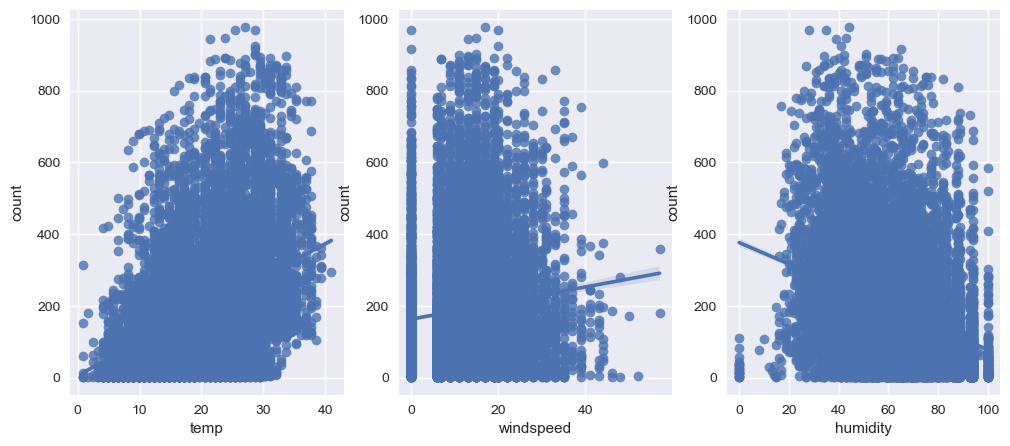

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,5))

temp_scatter_plot = pd.concat([df_train['count'], df_train['temp']], axis = 1)
sns.regplot(x='temp', y='count', data=temp_scatter_plot, scatter = True, fit_reg=True, ax=ax1)

windspeed_scatter_plot = pd.concat([df_train['count'], df_train['windspeed']], axis = 1)
sns.regplot(x='windspeed', y='count', data=windspeed_scatter_plot, scatter=True, fit_reg=True, ax=ax2)

humidity_scatter_plot = pd.concat([df_train['count'], df_train['humidity']], axis = 1)
sns.regplot(x='humidity', y='count', data=humidity_scatter_plot, scatter=True, fit_reg=True, ax=ax3)

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

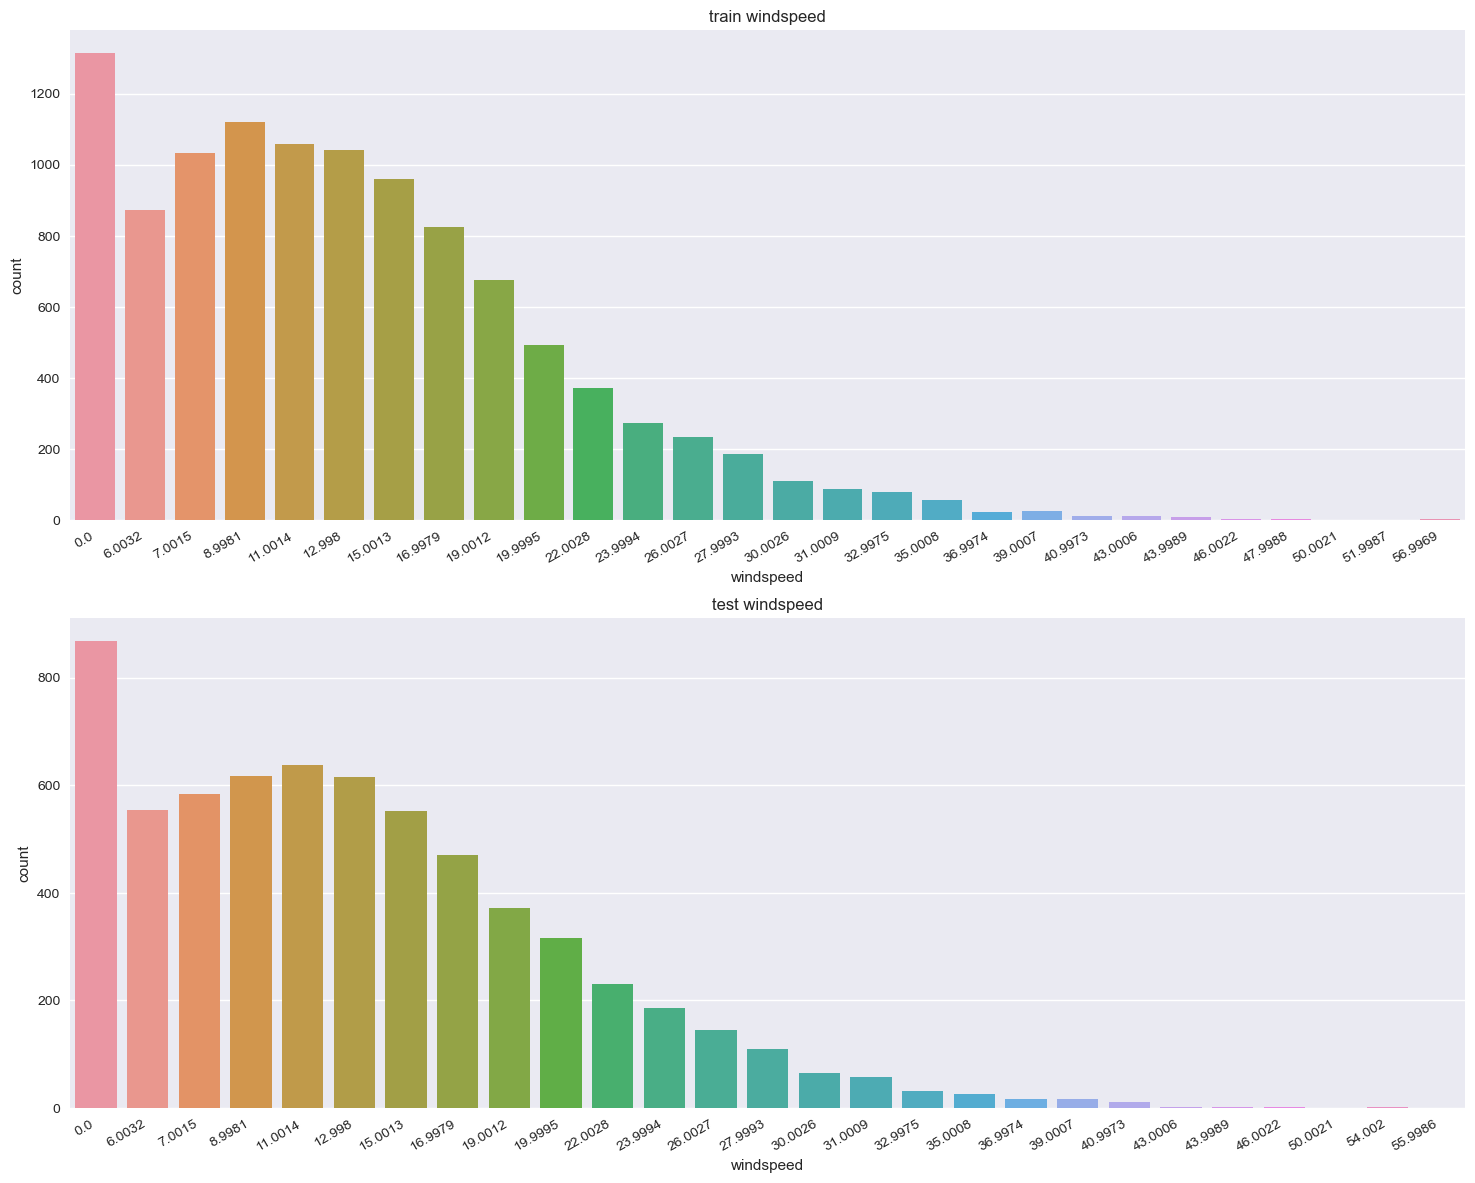

In [34]:
fig, axes = plt.subplots(nrows=2, figsize = (18,14))

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = 'train windspeed')
sns.countplot(data = df_train, x = 'windspeed', ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = 'count', title = 'test windspeed')
sns.countplot(data = df_test, x = "windspeed", ax = axes[1])

In [35]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

df_train["year_month"] = df_train["datetime"].apply(concatenate_year_month)
df_test["year_month"] = df_test["datetime"].apply(concatenate_year_month)

print(df_train.shape)
df_train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

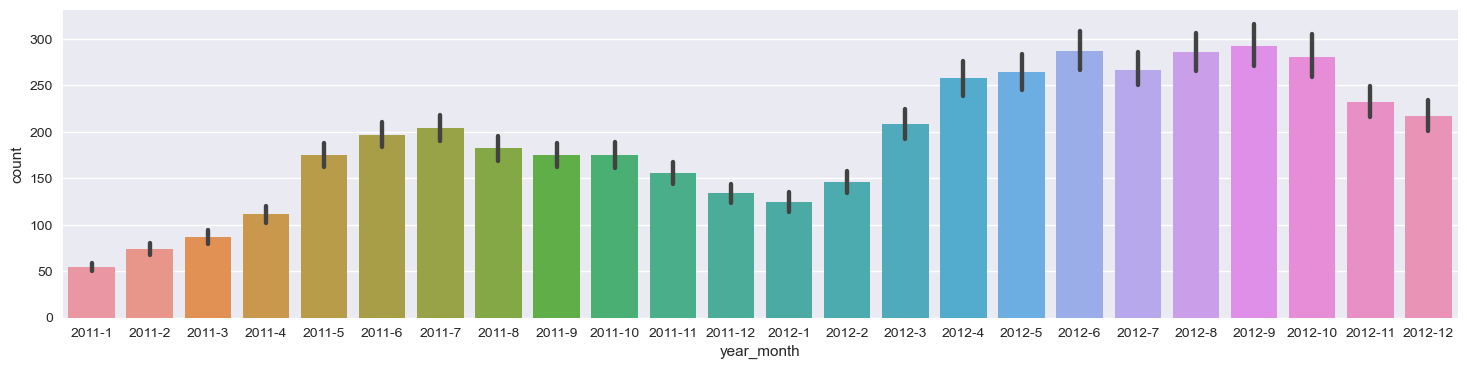

In [36]:
fig, ax = plt.subplots(figsize = (18, 4))
sns.barplot(data = df_train, y = 'count', x = "year_month")

In [39]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

Outliers_to_drop = detect_outliers(df_train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [40]:
df_train.loc[Outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3,2012-4
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4,2012-4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3,2012-5
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3,2012-5
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4,2012-5


In [41]:
df_train = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df_train.shape

(10846, 20)

In [42]:
df_train_num = df_train[["count", "temp", "atemp", "casual", "registered", "humidity", "windspeed"]]

for col in df_train_num:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(df_train[col].skew()),
          '   ',
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())
         )

count           Skewness: 01.21     Kurtosis: 001.20
temp            Skewness: 00.01     Kurtosis: -00.91
atemp           Skewness: -0.10     Kurtosis: -00.85
casual          Skewness: 02.52     Kurtosis: 007.74
registered      Skewness: 01.51     Kurtosis: 002.61
humidity        Skewness: -0.09     Kurtosis: -00.76
windspeed       Skewness: 00.58     Kurtosis: 000.63


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by minute')]

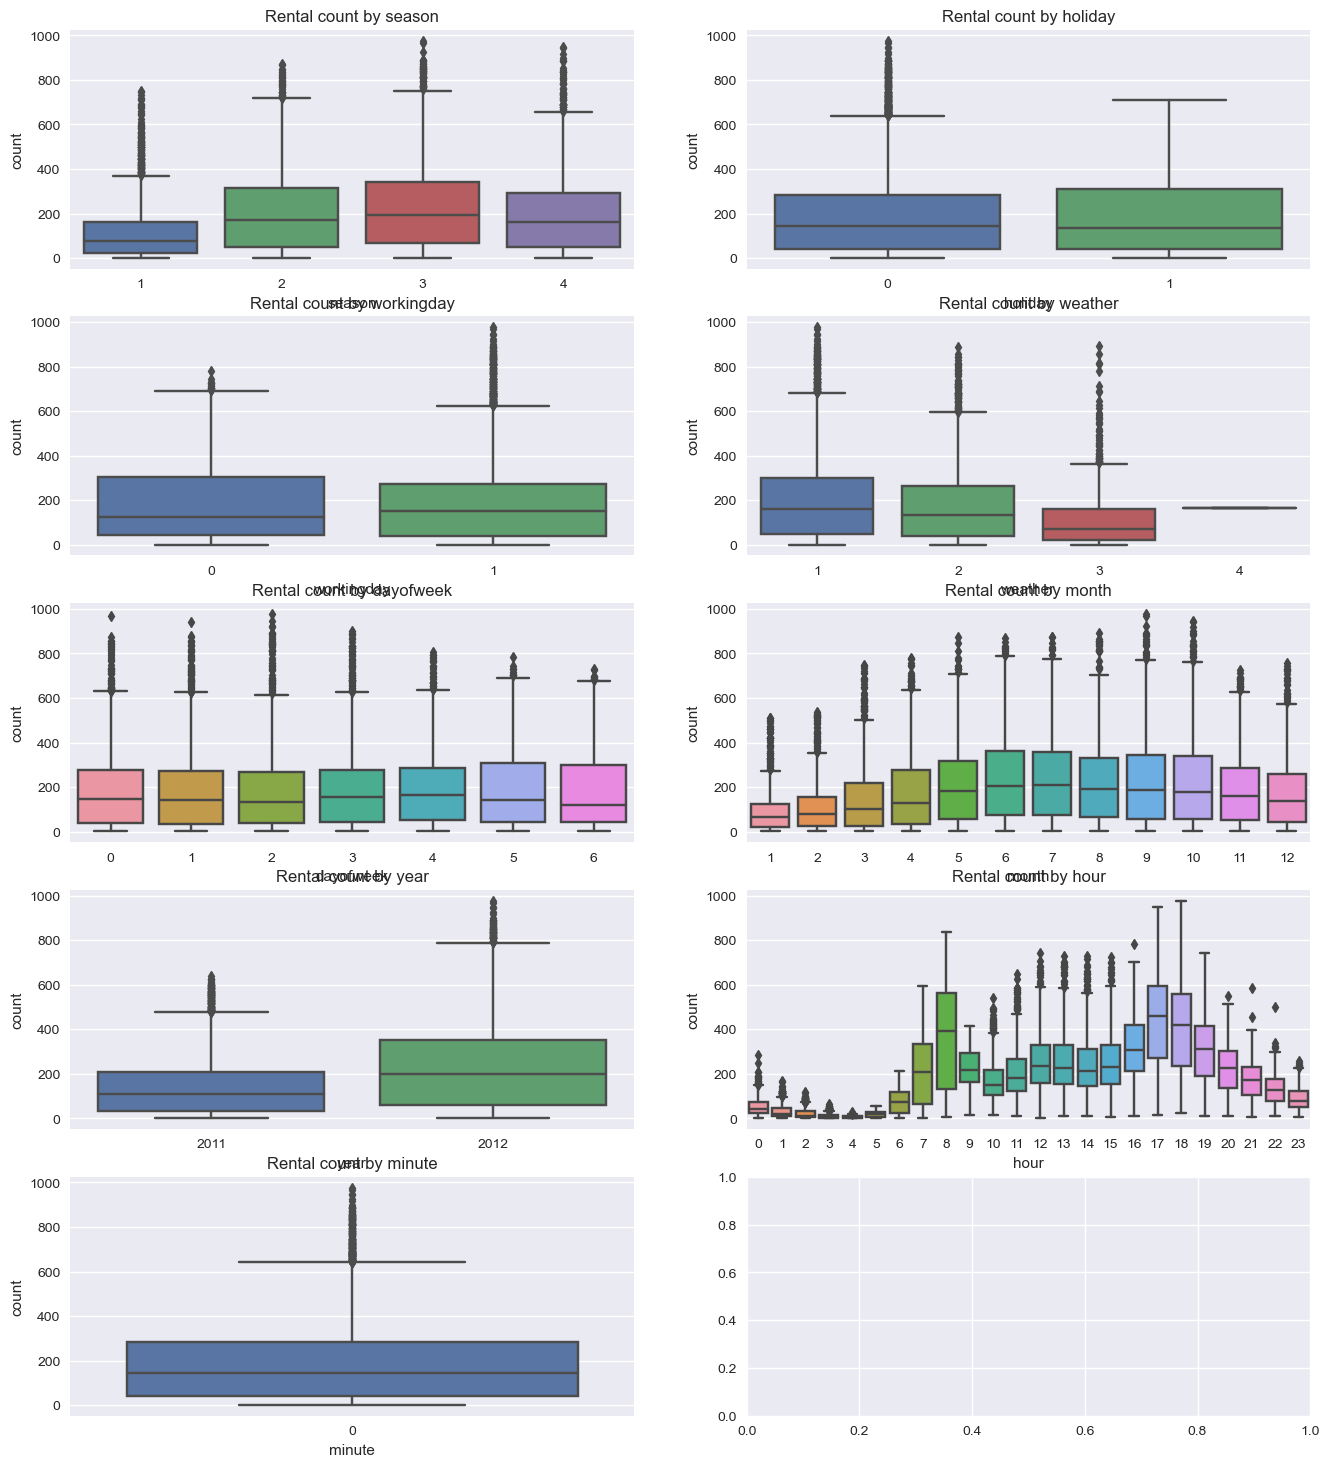

In [43]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (16,18))
sns.boxplot(data = df_train, y = 'count', x = 'season', orient = 'v', ax = axes[0][0])
sns.boxplot(data = df_train, y = 'count', x = 'holiday', orient = 'v', ax = axes[0][1])
sns.boxplot(data = df_train, y = 'count', x = 'workingday', orient = 'v', ax = axes[1][0])
sns.boxplot(data = df_train, y = 'count', x = 'weather', orient = 'v', ax = axes[1][1])
sns.boxplot(data = df_train, y = 'count', x = 'dayofweek', orient = 'v', ax = axes[2][0])
sns.boxplot(data = df_train, y = 'count', x = 'month', orient = 'v', ax = axes[2][1])
sns.boxplot(data = df_train, y = 'count', x = 'year', orient = 'v', ax = axes[3][0])
sns.boxplot(data = df_train, y = 'count', x = 'hour', orient = 'v', ax = axes[3][1])
sns.boxplot(data = df_train, y = 'count', x = 'minute', orient = 'v', ax = axes[4][0])

axes[0][0].set(ylabel = "count", title = "Rental count by season")
axes[0][1].set(ylabel = "count", title = "Rental count by holiday")
axes[1][0].set(ylabel = "count", title = "Rental count by workingday")
axes[1][1].set(ylabel = "count", title = "Rental count by weather")
axes[2][0].set(ylabel = "count", title = "Rental count by dayofweek")
axes[2][1].set(ylabel = "count", title = "Rental count by month")
axes[3][0].set(ylabel = "count", title = "Rental count by year")
axes[3][1].set(ylabel = "count", title = "Rental count by hour")
axes[4][0].set(ylabel = "count", title = "Rental count by minute")

Skewness: 1.210923
Kurtosis: 1.200871


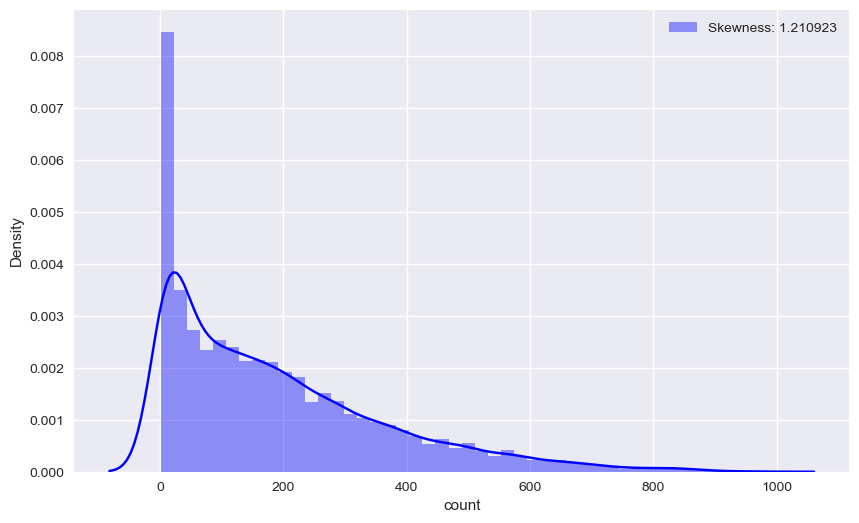

In [44]:
### Part 3. Feature Engineering

f, ax = plt.subplots(1, 1, figsize = (10, 6))
g = sns.distplot(df_train["count"], color = "b", label = "Skewness: {:2f}".format(df_train["count"].skew()), ax = ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df_train["count"].skew())
print("Kurtosis: %f" % df_train["count"].kurt())


Skewness: -0.975198
Kurtosis: 0.247435


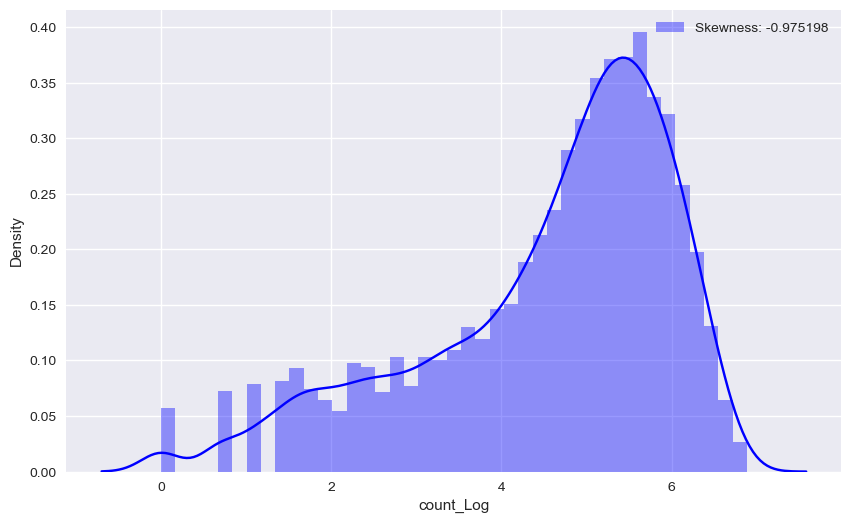

In [46]:
df_train["count_Log"] = df_train["count"].map(lambda i:np.log(i) if i > 0 else 0)

f, ax = plt.subplots(1, 1, figsize = (10, 6))
g = sns.distplot(df_train["count_Log"], color = "b", label = "Skewness: {:2f}".format(df_train["count_Log"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df_train['count_Log'].skew())
print("Kurtosis: %f" % df_train['count_Log'].kurt())

df_train.drop('count', axis = 1, inplace=True)

In [47]:
trainWind0 = df_train.loc[df_train["windspeed"] == 0]
trainWindNot0 = df_train.loc[df_train["windspeed"] != 0]

In [65]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"])
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0
    
    data = predictWindNot0.append(predictWind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data

In [66]:
df_train = predict_windspeed(df_train)
df_test = predict_windspeed(df_test)

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14))

plt.sca(ax1)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "train windspeed")
sns.countplot(data = df_train, x = "windspeed", ax = ax1)

plt.sca(ax2)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "test windspeed")
sns.countplot(data = df_test, x = "windspeed", ax = ax2)

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

In [62]:
corr_data = df_train[["count_Log", "windspeed"]]
corr_data.corr()

,count_Log,windspeed
count_Log,1.000000,0.125801
windspeed,0.125801,1.000000
